# Anomaly Detection (basic)

These Python examples illustrates the concept of **anomaly detection** using both a *binary label* and a *score output*. 

We'll start with a simple 1D example using the **z-score** for anomaly detection, and then move on to a 2D example using the **Mahalanobis distance**.

# 1D Example: Z-Score

In this example, we'll use the **z-score** to detect anomalies in a 1D dataset. The **z-score** measures how many standard deviations an element is from the mean. A high absolute z-score indicates that the data point is far from the mean, which can be considered anomalous.

Anomalies: [100]
Anomaly Scores: [3.73260901]


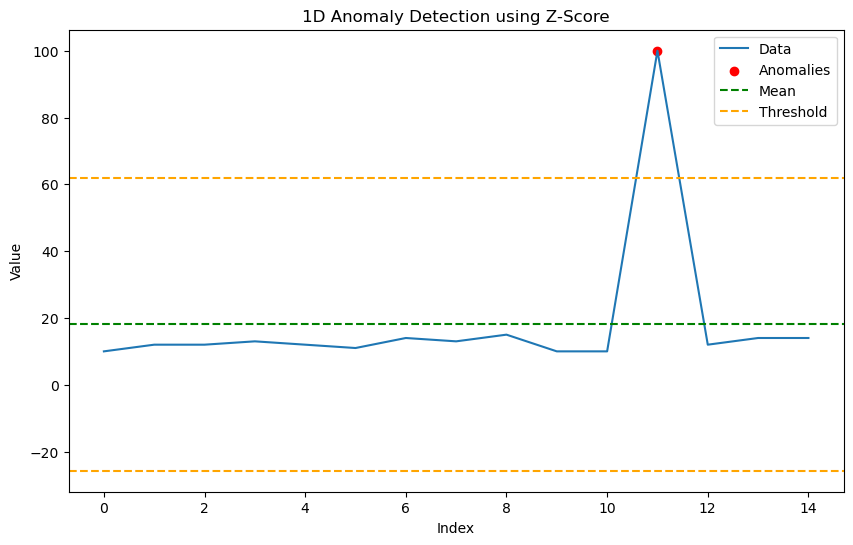

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = np.array([10, 12, 12, 13, 12, 11, 14, 13, 15, 10, 10, 100, 12, 14, 14])

# Calculate the mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

# Calculate the z-scores
z_scores = (data - mean) / std_dev

# Define a threshold for anomaly detection
threshold = 2

# Identify anomalies
anomalies = data[np.abs(z_scores) > threshold]
anomaly_scores = z_scores[np.abs(z_scores) > threshold]
anomaly_indices = np.where(np.abs(z_scores) > threshold)[0]

print("Anomalies:", anomalies)
print("Anomaly Scores:", anomaly_scores)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data, label='Data')
plt.scatter(anomaly_indices, anomalies, color='red', label='Anomalies')
plt.axhline(mean, color='green', linestyle='--', label='Mean')
plt.axhline(mean + threshold * std_dev, color='orange', linestyle='--', label='Threshold')
plt.axhline(mean - threshold * std_dev, color='orange', linestyle='--')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('1D Anomaly Detection using Z-Score')
plt.show()

## 2D Example: Mahalanobis Distance

In this example, we'll use the **Mahalanobis distance** to detect anomalies in a 2D dataset. The Mahalanobis distance takes into account the correlations between variables, making it more suitable for multivariate data.

2D Anomalies: [[5 9]]
2D Anomaly Scores: [2.56588018]


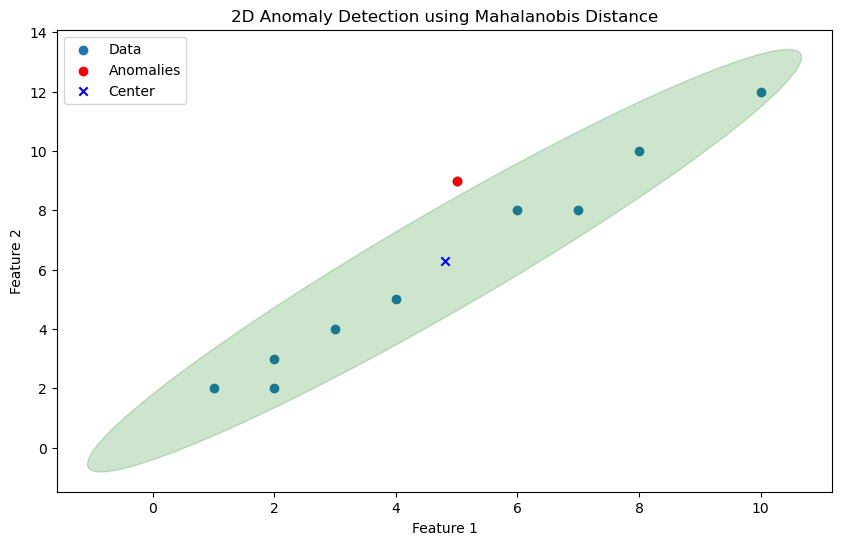

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from matplotlib.patches import Ellipse

def plot_cov_ellipse(mean, cov, nstd=2, **kwargs):
    """
    Plots an ellipse representing the covariance matrix.

    You can adjust the 'nstd' parameter to better capture the normal region. 
    A common choice is to set nstd to a fixed value, such as 2 or 3, which corresponds 
    to the 95% or 99.7% confidence interval for a bivariate normal distribution, respectively.
    """
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    theta = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * nstd * np.sqrt(eigvals)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=theta, **kwargs)
    return ellipse
    
# Sample 2D data
data_2d = np.array([[1, 2], [2, 2], [2, 3], [3, 4], [4, 5], [5, 9], [6, 8], [7, 8], [8, 10], [10, 12]])

# Calculate the mean and covariance matrix
mean_2d = np.mean(data_2d, axis=0)
cov_matrix = np.cov(data_2d.T)

# Calculate the Mahalanobis distance for each data point
mahalanobis_distances = np.array([distance.mahalanobis(point, mean_2d, np.linalg.inv(cov_matrix)) for point in data_2d])

# Define a threshold for anomaly detection (e.g., 95th percentile of the Mahalanobis distance)
threshold_2d = np.percentile(mahalanobis_distances, 95)

# Identify anomalies
anomalies_2d = data_2d[mahalanobis_distances > threshold_2d]
anomaly_scores_2d = mahalanobis_distances[mahalanobis_distances > threshold_2d]

print("2D Anomalies:", anomalies_2d)
print("2D Anomaly Scores:", anomaly_scores_2d)


# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], label='Data')
plt.scatter(anomalies_2d[:, 0], anomalies_2d[:, 1], color='red', label='Anomalies')

# Plot the covariance ellipse
ellipse = plot_cov_ellipse(mean_2d, cov_matrix, alpha=0.2, color='green')
# ellipse = plot_cov_ellipse(mean_2d, cov_matrix, nstd=np.sqrt(threshold_2d), alpha=0.2, color='green')
plt.gca().add_patch(ellipse)

# Plot the center of the ellipse
plt.scatter(mean_2d[0], mean_2d[1], color='blue', marker='x', label='Center')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Anomaly Detection using Mahalanobis Distance')
plt.legend()
plt.show()
